In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
path= "combf"
path= "small"
path_csv="bm18_data3_0pass1_freq0_big1_pa100_t12_eq1_lc1.csv"

In [3]:
path= "/home/orchidee02/ydxu/AGBrecovery/1-data/TMF/4-30m-1deg_cf/bm18_data3_0pass1_freq0_big1_pa100_t122_eq1_lc0/figure/combf"
path= "/home/orchidee02/ydxu/AGBrecovery/1-data/TMF/4-30m-1deg_cf/bm18_data3_0pass1_freq0_big1_pa100_t12_eq1_lc1/figure/combf"
path_csv="/home/orchidee02/ydxu/AGBrecovery/1-data/TMF/4-30m-1deg_cf_noplot/bm18_data3_0pass1_freq0_big1_pa100_t12_eq1_lc1"

In [4]:
path = "/home/orchidee03/ydxu/AGBrecovery/1-data/DEA/4-30m-1deg_cf/bm20_data3_0pass1_freq0_big1_pa100_t122_eq1_lc0/figure/combf"
path_csv = "/home/orchidee03/ydxu/AGBrecovery/1-data/DEA/4-30m-1deg_cf_noplot/allresult/bm20_data3_0pass1_freq0_big1_pa100_t122_eq1_lc0.csv"
path_csv = "/home/orchidee03/ydxu/AGBrecovery/1-data/DEA/4-30m-1deg_cf_noplot/allresult2/bm20_data3_0pass1_freq0_big1_pa100_t122_eq2_lc0.csv"

In [5]:
import os
import geopandas
import pandas as pd
import folium
import base64

In [6]:
from shapely.geometry import Polygon

def create_polygon(box):
    """create box polygon for clipping the geopands df
    """
    (max_lat, min_lon), (min_lat, max_lon) = box
    return Polygon([(min_lon, max_lat), 
                    (min_lon, min_lat), 
                    (max_lon, min_lat), 
                    (max_lon, max_lat), 
                    (min_lon, max_lat)])

In [7]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

class MplColorHelper:

  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = matplotlib.colors.Normalize(vmin=start_val, vmax=stop_val)
    self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)

In [9]:
files = os.listdir(path)

In [10]:
rdf = pd.read_csv(path_csv, header=None)
rdf = rdf[(rdf[0]==4)&(rdf[4]>0)]
rdf

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
26,4,-13,126,27,0.508300,0.508300,22.067,15,80,88904.0,...,37,0,0,0,0,0,0,0,119.0,0.0
27,4,-13,127,28,0.444280,0.444280,18.724,12,80,30890.0,...,39,0,0,0,0,0,0,0,109.0,0.0
40,4,-14,125,41,0.410880,0.410880,21.193,17,80,572270.0,...,34,0,0,0,0,0,0,0,129.0,129.0
41,4,-14,126,42,0.096125,0.096125,16.602,17,80,502390.0,...,45,0,0,0,0,0,0,0,119.0,119.0
42,4,-14,127,43,0.067559,0.067559,26.803,11,80,87646.0,...,41,0,0,0,0,0,0,0,103.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,4,-40,143,815,0.452220,0.452220,42.889,15,80,53129.0,...,89,0,0,0,0,0,0,0,286.0,0.0
818,4,-40,147,819,0.293530,0.293530,59.722,24,80,508740.0,...,80,0,0,0,0,0,0,0,271.0,0.0
824,4,-41,147,825,0.124180,0.124180,56.650,32,80,7057500.0,...,76,0,0,0,0,0,0,0,329.0,0.0
829,4,-42,147,830,0.489820,0.489820,39.679,32,80,6000100.0,...,71,0,0,0,0,0,0,0,254.0,0.0


In [ ]:
15:recovery time 
16:recovery time 

In [105]:
lat =[]
lon =[]
R2 =[]
geometry =[]
file =[]
RT = []
added =[]
for index, row in rdf.iterrows():
    la, lo, r2, rt = int(row[1]), int(row[2]), row[4], row[15]
    if rt>100:
        rt=100
    f = [files.index(l) for l in files if l.startswith(f"{la}_{lo}")]
    lat.append(la)
    lon.append(lo)
    R2.append(r2)
    RT.append(rt)
    geometry.append(create_polygon(((la,lo+1),(la-1, lo))))
    file.append(None if len(f)==0 else files[f[0]])
    added.append(files[f[0]])

In [106]:
for ff in files:
    if ff not in added:
        la = int(ff.split("_")[0])
        lo = int(ff.split("_")[1])
        f = [files.index(l) for l in files if l.startswith(f"{la}_{lo}")]
        lat.append(la)
        lon.append(lo)
        R2.append(None)
        RT.append(None)
        geometry.append(create_polygon(((la,lo+1),(la-1, lo))))
        file.append(None if len(f)==0 else files[f[0]])

In [107]:
d = {'lat': lat, 'lon': lon, "r2":R2, "recovery time":RT, "file":file, "geometry": geometry}
gdf = geopandas.GeoDataFrame(d, crs='epsg:4326')

In [108]:
# gdf.explore(column="r2", cmap="copper",style_kwds={"weight":0.1})

In [109]:
s=0
for i, r in gdf.iterrows():
    if r["file"] is None:
        s+=1
s

0

In [110]:
gdf

,lat,lon,r2,recovery time,file,geometry
0,-13,126,0.508300,25.2830,-13_126_27_211221213211.png,"POLYGON ((127.00000 -13.00000, 127.00000 -14.0..."
1,-13,127,0.444280,19.1860,-13_127_28_211221213211.png,"POLYGON ((128.00000 -13.00000, 128.00000 -14.0..."
2,-14,125,0.410880,20.7000,-14_125_41_211221213211.png,"POLYGON ((126.00000 -14.00000, 126.00000 -15.0..."
3,-14,126,0.096125,9.5586,-14_126_42_211221213211.png,"POLYGON ((127.00000 -14.00000, 127.00000 -15.0..."
4,-14,127,0.067559,16.5150,-14_127_43_211221213211.png,"POLYGON ((128.00000 -14.00000, 128.00000 -15.0..."
...,...,...,...,...,...,...
538,-35,141,NaN,NaN,-35_141_27_211221213211.png,"POLYGON ((142.00000 -35.00000, 142.00000 -36.0..."
539,-13,136,NaN,NaN,-13_136_36_211221213211.png,"POLYGON ((137.00000 -13.00000, 137.00000 -14.0..."
540,-29,144,NaN,NaN,-29_144_47_211221213211.png,"POLYGON ((145.00000 -29.00000, 145.00000 -30.0..."
541,-24,129,NaN,NaN,-24_129_41_211221213211.png,"POLYGON ((130.00000 -24.00000, 130.00000 -25.0..."


In [111]:
m = gdf.explore(name="r2", column="r2", cmap="Reds",style_kwds={"weight":0.5})
m

In [ ]:
# color_map = MplColorHelper("autumn_r",0,1)
# m = folium.Map()
m = gdf.explore(name="r2", column="r2", cmap="Reds",style_kwds={"weight":0.5})
gdf.explore(name="recovery time", column="recovery time", cmap="YlGn",style_kwds={"weight":0.5}, m=m)

fg = folium.FeatureGroup(name="plots", show=True)

# create a geojson layer for each feature
for i, r in gdf.iterrows():
    # if i>100:
    #     break
    # if i%3!=0 or r["file"] is None:
    #     continue
    # geodataframe of row
    gdf_ = geopandas.GeoDataFrame(r.to_frame().T, crs=gdf.crs)
    
    scr = ""
    if r["file"] is not None:
        f_path = os.path.join(path, r["file"])
        encoded = base64.b64encode(open(f_path, 'rb').read())
        scr = "data:image/png;base64," + encoded.decode("utf-8")
    # URI encoded image of plotly figure
    img_ = f'<img width="450" height="450" src="{scr}"/>'

        
    choro_ = folium.GeoJson(
        gdf_.__geo_interface__,
        name=r["file"],
        style_function=lambda x: {"fillOpacity":0,
                                  "opacity":0},
        tooltip=folium.GeoJsonTooltip(gdf_.drop(columns=["file", "geometry"]).columns.tolist()),
    )
    # this is the real work around, add to layer which is a choro
    folium.Popup(img_).add_to(choro_)
    choro_.add_to(fg)

fg.add_to(m)
folium.LayerControl().add_to(m)
m.save("map.html")
m

In [41]:
m.save("map.html")

In [110]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

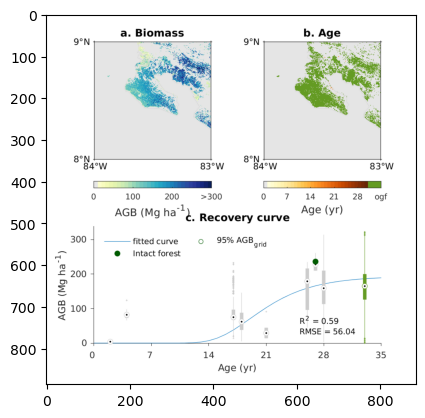

In [111]:
img = mpimg.imread(f_path)
plt.imshow(img)

In [44]:
color

(0.029065737105639713, 0.018381176470588234, 0.011705882352941177, 1.0)

In [45]:
COL = MplColorHelper('autumn_r', 0, 1)

In [16]:
from PIL import Image

In [17]:
out = "small_DEA"
for f in files:
    image = Image.open(os.path.join(path, f))
    new_image = image.resize((500, 500))
    new_image.save(os.path.join(out, f))